In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
urls = ['https://www.eldiarioar.com/politica/capitanich-no-descarto-gobierne-utilice-decretos-si-no-avanzan-sesiones-extraordinarias-congreso_1_9873916.html',
        'https://www.eldiarioar.com/politica/control-precios-moyano-busca-sumar-grabois-piqueteros-super-costa-aval-massa_1_9871199.html',
        'https://www.eldiarioar.com/politica/alberto-fernandez-planteaban-apocalipsis-economia-crece_1_9871174.html',
        'https://www.eldiarioar.com/politica/ahorro-2500-millones-baja-150-mil-planes-ira-obra-publica-realizan-organizaciones-sociales_1_9871132.html',
        'https://www.eldiarioar.com/politica/carrio-denunciara-alberto-fernandez-massa-tombolini-grupos-parapoliciales-controlar-precios_1_9870620.html',
        'https://www.eldiarioar.com/sociedad/mil-lianas/invitacion-david-bowie-estrella-porno-apuros_129_9842796.html',
        'https://www.eldiarioar.com/sociedad/mil-lianas/crujido-90-ecos-balances-rotos_129_9828875.html',
        'https://www.eldiarioar.com/sociedad/mil-lianas/fiesta-oda-viajes-inventados_129_9817802.html',
        'https://www.eldiarioar.com/sociedad/mil-lianas/fragmentos-amor-salvaje-infierno-rejas_129_9798132.html',
        'https://www.eldiarioar.com/sociedad/mil-lianas/palabra-ano-mano-dios-reves_129_9774404.html',]
        

In [3]:
noticias = {}
for url in urls:
    r = requests.get(url)
    soup = BeautifulSoup(r.content, 'html.parser')
    parrafos = soup.find_all('p', class_='article-text')
    texto = ''
    for parrafo in parrafos:
        texto = texto + parrafo.text
    noticias[url] = texto

In [4]:
textos = pd.DataFrame([])
textos['url'] = noticias.keys()
textos['texto'] = textos['url'].apply(lambda x: noticias[x])
textos['Categoria'] = ['Politica','Politica','Politica','Politica','Politica','Sociedad','Sociedad','Sociedad','Sociedad','Sociedad']

In [5]:
textos

,url,texto,Categoria
0,https://www.eldiarioar.com/politica/capitanich...,"\n El gobernador del Chaco, Jorge Capit...",Politica
1,https://www.eldiarioar.com/politica/control-pr...,\nEl operativo de control de Precios Justos su...,Politica
2,https://www.eldiarioar.com/politica/alberto-fe...,\n El presidente Alberto Fernández aseg...,Politica
3,https://www.eldiarioar.com/politica/ahorro-250...,\n El Gobierno confirmó esta tarde que ...,Politica
4,https://www.eldiarioar.com/politica/carrio-den...,"\nElisa “Lilita” Carrió, titular de la Coalici...",Politica
5,https://www.eldiarioar.com/sociedad/mil-lianas...,\n Un triángulo: David Byrne (el ex Tal...,Sociedad
6,https://www.eldiarioar.com/sociedad/mil-lianas...,\n“Donde no hay ecos el silencio es tan horrib...,Sociedad
7,https://www.eldiarioar.com/sociedad/mil-lianas...,\nUno. “El problema de la fiesta es el fin de ...,Sociedad
8,https://www.eldiarioar.com/sociedad/mil-lianas...,\nNo sé por qué no puedes hacer bien las cosas...,Sociedad
9,https://www.eldiarioar.com/sociedad/mil-lianas...,\nUno. Diciembre es el mes de la hipérbole (de...,Sociedad


In [8]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords 


In [9]:
spanishStemmer=SnowballStemmer("spanish")
stopwords_sp = stopwords.words('spanish')

# si no hacemos esto y usamos directo stopwords_sp, CountVectorizer devuelve un warning
stopwords_sp_stem = [spanishStemmer.stem(x) for x in stopwords_sp]

vectorizer = CountVectorizer(stop_words = stopwords_sp_stem, lowercase = True, strip_accents = 'unicode');

vectorizer.fit(textos['texto']);
print('Vocabulario:\n',vectorizer.vocabulary_) # vocabulario del corpus con la frecuencia de cada término


Vocabulario:
 {'gobernador': 1681, 'chaco': 630, 'jorge': 2018, 'capitanich': 562, 'analizo': 248, 'martes': 2208, 'existe': 1481, 'bloqueo': 463, 'institucional': 1939, 'parte': 2588, 'juntos': 2032, 'cambio': 531, 'jxc': 2039, 'congreso': 795, 'presidente': 2839, 'alberto': 194, 'fernandez': 1548, 'tiene': 3531, 'facultades': 1516, 'como': 736, 'para': 2569, 'poder': 2762, 'actuar': 119, 'considero': 813, 'prioritario': 2864, 'discutir': 1177, 'reforma': 3067, 'sistema': 3348, 'judicial': 2022, 'consensos': 809, 'aseguro': 361, 'cuenta': 943, 'herramientas': 1768, 'intervenir': 1974, 'contar': 825, 'respaldo': 3130, 'popular': 2785, 'pido': 2705, 'oposicion': 2525, 'dejen': 1025, 'mentir': 2259, 'tiempos': 3530, 'muchos': 2359, 'dirigentes': 1170, 'muestran': 2363, 'paladines': 2564, 'etica': 1460, 'tienen': 3532, 'doble': 1203, 'discurso': 1175, 'unico': 3651, 'hacen': 1730, 'herir': 1762, 'muerte': 2361, 'instituciones': 1940, 'democracia': 1034, 'concretamente': 779, 'chaqueno': 6

In [10]:
countvectorizer_encoding = vectorizer.transform(textos['texto'])
print('\n Transformamos los textos a una matriz esparsa:',type(countvectorizer_encoding))

pd.DataFrame(countvectorizer_encoding.todense(), 
             columns = vectorizer.get_feature_names_out()) # Usamos el método .todense() para ver la matriz completa


 Transformamos los textos a una matriz esparsa: <class 'scipy.sparse.csr.csr_matrix'>


,10,100,1080,12,120,150,1500,154,1740,1790,...,yapa,yendo,york,youtube,zabaleta,zapatillas,zapatos,zapping,zumbido,zurro
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,1,0,0,1
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
7,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
9,0,5,1,0,0,0,1,0,1,1,...,1,1,0,0,0,0,0,0,0,0


In [11]:
from sklearn.feature_extraction.text import TfidfTransformer

Tfidf_encoding=TfidfTransformer().fit_transform(countvectorizer_encoding);

pd.DataFrame(Tfidf_encoding.todense(),columns=vectorizer.get_feature_names_out())

,10,100,1080,12,120,150,1500,154,1740,1790,...,yapa,yendo,york,youtube,zabaleta,zapatillas,zapatos,zapping,zumbido,zurro
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.072457,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.037995,0.037995,0.000000,0.037995,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.037995,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.045265,0.022632,0.000000,0.000000,0.022632
6,0.025884,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.025884,0.000000,0.000000,0.000000,0.000000,0.022004,0.000000
7,0.000000,0.020534,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.024155,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.026056,0.022150,0.000000
9,0.000000,0.094550,0.022245,0.000000,0.000000,0.000000,0.022245,0.000000,0.022245,0.022245,...,0.022245,0.022245,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


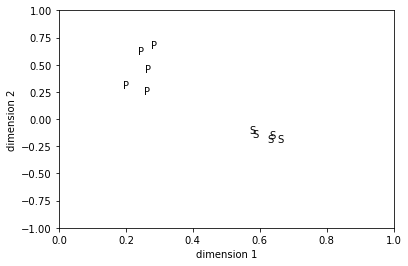

In [16]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2);
P = svd.fit_transform(Tfidf_encoding)

plt.figure()

for i in range(textos.shape[0]):
    plt.annotate(textos['Categoria'].iloc[i][0],P[i])
    
    

plt.xlabel('dimension 1')
plt.ylabel('dimension 2')
plt.axis([0, 1, -1, 1])
plt.show()

In [13]:
import numpy as np

In [14]:
n = 30
# coeficientes (pesos) de los términos en cada una de las dos dimensiones
comp1,comp2 = svd.components_ 

# los ordenamos de menor a mayor y nos quedamos con los índices de sus posiciones en el array
indices_1=np.argsort(comp1)
indices_2=np.argsort(comp2)

# invertimos para que queden ordenados de mayor a menor
indices_1=indices_1[::-1] 
indices_2=indices_2[::-1]

# Evaluamos los términos en estas posiciones
print('Dimension 1:')
print(np.array(vectorizer.get_feature_names_out())[indices_1[:n]])


print('Dimension 2:')
print(np.array(vectorizer.get_feature_names_out())[indices_2][:n])

Dimension 1:
['para' 'como' 'todo' 'aca' 'sobre' 'tiempo' 'hasta' 'dias' 'vez' 'ano'
 'vida' 'novela' '2022' 'lopez' 'pero' 'hace' 'porque' 'puede' 'libro'
 'siempre' 'cada' 'desde' 'momentos' 'leer' 'david' 'poco' 'todos'
 'aunque' 'va' 'escritora']
Dimension 2:
['precios' 'programa' 'gobierno' 'moyano' 'controlar' 'larreta' 'ciencia'
 'supermercados' 'comercio' 'camioneros' 'tombolini' 'barrios' 'operativo'
 'justos' 'estado' 'social' 'beneficiarios' 'tecnologia' 'sociales'
 'carrio' 'argentinos' 'contra' 'economia' 'paz' 'control' 'dirigente'
 'personas' 'potenciar' 'organizacion' 'tolosa']
